In [10]:
#Imports
import os
import glob
import nilearn
import numpy as np
import pandas as pd
import nibabel as nib

from numpy import savetxt
from nilearn.input_data import NiftiLabelsMasker

# Output directories 

output_dir = '/project/4180000.19/multirat_stim/scratch/rabies_test/first_level/'
mask_rois_dir = os.path.join(output_dir, 'mask_ROIs/')
mask_zscores_dir = os.path.join(output_dir, 'mask_ROIs/z_scores/')
residuals_dir = os.path.join(output_dir, 'mask_ROIs/residuals/')
effect_size_dir = os.path.join(output_dir, 'mask_ROIs/effect_size/')
effect_variance_dir = os.path.join(output_dir, 'mask_ROIs/effect_variance/')
real_timeseries_dir = os.path.join(output_dir, 'mask_ROIs/real_timeseries/')
predicted_timeseries_dir = os.path.join(output_dir, 'mask_ROIs/predicted_timeseries/')


if not os.path.exists(mask_rois_dir):
    os.makedirs(mask_rois_dir)
if not os.path.exists(mask_zscores_dir):
    os.makedirs(mask_zscores_dir)
if not os.path.exists(real_timeseries_dir):
    os.makedirs(real_timeseries_dir)
if not os.path.exists(residuals_dir):
    os.makedirs(residuals_dir)  
if not os.path.exists(effect_size_dir):
    os.makedirs(effect_size_dir)
if not os.path.exists(effect_variance_dir):
    os.makedirs(effect_variance_dir)
if not os.path.exists(predicted_timeseries_dir):
    os.makedirs(predicted_timeseries_dir)
    

In [6]:
# - Init Variables 

    # Load atlas 
template_folder = '/groupshare/traaffneu/preclinimg/templates/'

template_path = template_folder+'/SIGMA_Wistar_Rat_Brain_TemplatesAndAtlases_Version1.1/SIGMA_Rat_Anatomical_Imaging/SIGMA_Rat_Anatomical_InVivo_Template/SIGMA_InVivo_Brain_Template.nii'
atlas_img = nib.load(template_folder+'SIGMA_Wistar_Rat_Brain_TemplatesAndAtlases_Version1.1/SIGMA_Rat_Brain_Atlases/SIGMA_Anatomical_Atlas/SIGMA_Anatomical_Brain_Atlas_rs.nii')
atlas_labels = template_folder+'/SIGMA_Wistar_Rat_Brain_TemplatesAndAtlases_Version1.1/SIGMA_Rat_Brain_Atlases/SIGMA_Anatomical_Atlas/SIGMA_Anatomical_Brain_Atlas_Labels.txt'
atlas_mask = nib.load(template_folder+'SIGMA_Wistar_Rat_Brain_TemplatesAndAtlases_Version1.1/SIGMA_Rat_Anatomical_Imaging/SIGMA_Rat_Anatomical_InVivo_Template/SIGMA_InVivo_Brain_Mask.nii')

    # Subject info 
metadata_rabies='/home/traaffneu/margal/code/multirat_se/script/table/metadata_rabies.tsv'
df = pd.read_csv(metadata_rabies, sep='\t')
df = df.loc[(df['exclude'] != 'yes')]

In [11]:
for index in range(0, 1):
    
    subj_num=str(df.iloc[index]['rat.sub'])[:-2]
    print('index:', index)
    print('subj:', subj_num)
    
    subj_img = glob.glob("/project/4180000.19/multirat_stim/rabies/preprocess/sub-0{}_ses-1/bold_datasink/commonspace_bold/*/*/*.nii.gz".format(subj_num, subj_num, subj_num))[0]
    
    
     # - Load result from GLM analysis - 
        
    first_level_output = '/project/4180000.19/multirat_stim/scratch/rabies_test/first_level'
    z_scores = nib.load(first_level_output +'/z_score/z_score_sub-0{}_ses-1.nii.gz'.format(subj_num))
    residuals = nib.load(first_level_output +'/residuals/residuals_sub-0{}_ses-1.nii.gz'.format(subj_num))
    beta_estimates = nib.load(first_level_output + '/beta_estimates/beta_sub-0{}_ses-1.nii.gz'.format(subj_num))
    effect_var = nib.load(first_level_output + '/effect_var/effect_var_sub-0{}_ses-1.nii.gz'.format(subj_num))
    predicted_timeseries = nib.load(first_level_output +'/predicted_timeseries/predicted_timeseries_sub-0{}_ses-1.nii.gz'.format(subj_num))

    
    # - Extract signal from regions - 

    masker_stand = NiftiLabelsMasker(labels_img=atlas_img, mask_img=atlas_mask, standardize=True, detrend=True).fit(subj_img)
    masker = NiftiLabelsMasker(labels_img=atlas_img, mask_img=atlas_mask).fit(subj_img)

    z_scores = masker.fit_transform(z_scores)
    residuals = masker.fit_transform(residuals)
    effect_size = masker.fit_transform(beta_estimates)
    effect_var = masker.fit_transform(effect_var)
    real_timeseries = masker_stand.fit_transform(subj_img)
    predicted_timeseries = masker.fit_transform(predicted_timeseries)

        # Save as .csv file
    savetxt(mask_zscores_dir+'zscores_sub-0{}_ses-1.csv'.format(subj_num), z_scores, delimiter=',')     
    savetxt(residuals_dir+'residuals_sub-0{}_ses-1.csv'.format(subj_num), residuals, delimiter=',')     
    savetxt(effect_size_dir+'effect_size_sub-0{}_ses-1.csv'.format(subj_num), effect_size, delimiter=',')    
    savetxt(effect_variance_dir+'effect_var_sub_sub-0{}_ses-1.csv'.format(subj_num), effect_var, delimiter=',')    
    savetxt(real_timeseries_dir+'real_timeseries_sub-0{}_ses-1.csv'.format(subj_num), real_timeseries, delimiter=',') 
    savetxt(predicted_timeseries_dir+'predicted_timeseries_sub-0{}_ses-1.csv'.format(subj_num), predicted_timeseries, delimiter=',')    


index: 0
subj: 200100


/home/traaffneu/margal/.conda/envs/MultiRatStim/lib/python3.9/site-packages/nilearn/maskers/nifti_labels_masker.py:578: UserWarning: After resampling the label image to the data image, the following labels were removed: {1051.0, 861.0, 991.0}. Label image only contains 229 labels (including background).
  warnings.warn("After resampling the label image to the "
/home/traaffneu/margal/.conda/envs/MultiRatStim/lib/python3.9/site-packages/nilearn/maskers/nifti_labels_masker.py:578: UserWarning: After resampling the label image to the data image, the following labels were removed: {1051.0, 861.0, 991.0}. Label image only contains 229 labels (including background).
  warnings.warn("After resampling the label image to the "


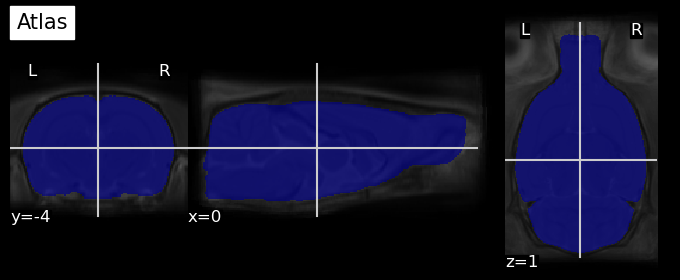

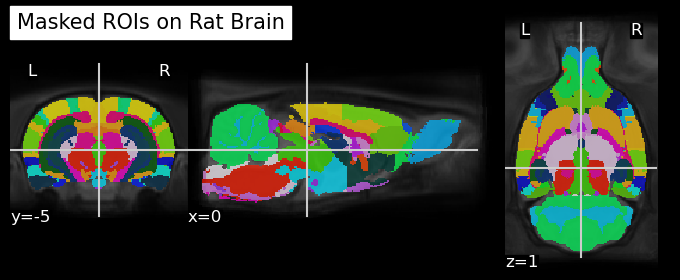

In [111]:
from nilearn import plotting

#report = masker.generate_report()
#report

plotting.plot_roi(atlas_mask, bg_img=template_path, title="Atlas")
plotting.plot_roi(masker.labels_img_, bg_img=template_path, title='Masked ROIs on Rat Brain') 

In [12]:
# -- Extract ROI per scan --

atlas_labels = (template_folder+'SIGMA_Wistar_Rat_Brain_TemplatesAndAtlases_Version1.1/SIGMA_Rat_Brain_Atlases/SIGMA_Anatomical_Atlas/SIGMA_Anatomical_Brain_Atlas_Labels.txt')
label_info = np.genfromtxt(atlas_labels, skip_header=10, delimiter='\t', dtype=str)


#Find index of the ROI 

label_to_find = "Primary Somatosensory Cortex Forelimb-L"      #to be defined in metadata 


for row in label_info:                                   
    if row[-1].strip('"') == label_to_find:         #access the last column of each row, remove quotes, compare
        label_idx = int(row[0])                     #if match, assign the index found at row0 to label_index
        print(label_idx)
        break
else:
    raise ValueError("Label '{}' not found in the label file.".format(label_to_find))

551


In [6]:
#Extract data from ROI

from nilearn.maskers import NiftiMasker


roi_mask = (nilearn.image.get_data(atlas_img) == label_idx).astype(bool)  # select ROI based on the index
mask_img = nilearn.image.new_img_like(atlas_img, roi_mask)                # create an mask image out of the roi selected

masker = NiftiMasker(mask_img=mask_img).fit(subj_img)                                   #apply a mask to extract time-series from subj_img
     
# roi_timeseries = masker.fit_transform(subj_img)
# roi_residuals = masker.fit_transform(fmri_glm.residuals[0])    
# roi_effect_size = masker.fit_transform(statistical_map['effect_size'])
# roi_effect_variance = masker.fit_transform(statistical_map['effect_variance'])
# roi_predicted_timeseries = masker.fit_transform(fmri_glm.predicted[0])

report = masker.generate_report()
report

/home/traaffneu/margal/.conda/envs/MultiRatStim/lib/python3.9/site-packages/nilearn/plotting/displays/_axes.py:71: UserWarning: No contour levels were found within the data range.
  im = getattr(ax, type)(data_2d.copy(),


Parameter,Value
detrend,False
dtype,None
high_pass,None
high_variance_confounds,False
low_pass,None
mask_args,None
mask_img,"<class 'nibabel.nifti1.Nifti1Image'> data shape (260, 342, 184) affine: [[ 0.09 0. 0. -11.60999966] [ 0. 0.09 0. -17.61750031] [ 0. 0. 0.09 -6.96597004] [ 0. 0. 0. 1. ]] metadata: <class 'nibabel.nifti1.Nifti1Header'> object, endian='<' sizeof_hdr : 348 data_type : b'' db_name : b'' extents : 0 session_error : 0 regular : b'' dim_info : 0 dim : [ 3 260 342 184 1 1 1 1] intent_p1 : 0.0 intent_p2 : 0.0 intent_p3 : 0.0 intent_code : none datatype : uint8 bitpix : 8 slice_start : 0 pixdim : [1. 0.09 0.09 0.09 1. 1. 1. 1. ] vox_offset : 0.0 scl_slope : nan scl_inter : nan slice_end : 0 slice_code : unknown xyzt_units : 0 cal_max : 0.0 cal_min : 0.0 slice_duration : 0.0 toffset : 0.0 glmax : 0 glmin : 0 descrip : b'' aux_file : b'' qform_code : unknown sform_code : aligned quatern_b : 0.0 quatern_c : 0.0 quatern_d : 0.0 qoffset_x : -11.61 qoffset_y : -17.6175 qoffset_z : -6.96597 srow_x : [ 0.09 0. 0. -11.61] srow_y : [ 0. 0.09 0. -17.6175] srow_z : [ 0. 0. 0.09 -6.96597] intent_name : b'' magic : b'n+1'"
mask_strategy,background
memory,Memory(location=None)
memory_level,1


In [ ]:
# remove 5 first seconds of the dataset 300,400,500

import subprocess

for i in range (0, 31)
subprocess.run("cd /project/4180000.19/multirat_stim/test_3dresample/")
subprocess.run("3dresample -input yourscan.nii.gz[5..$] -prefix yourscan_minus_first_5_timepoints.nii.gz", shell=True)
